## Step 1: Data Loading

In [1]:
# import necessary libraries
import pandas as pd
import chardet
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# Try reading the CSV with different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv(r"TeePublic_review.csv", encoding=encoding)
        print(f"Successfully read the CSV with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the CSV with encoding: {encoding}")
        

FileNotFoundError: [Errno 2] No such file or directory: 'TeePublic_review.csv'

In [83]:
# Display the first few rows
df.head()


,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [59]:
df.shape

(278100, 10)

In [84]:
# Check number of null values
missing_values = df.isna().sum()
print("Missing values in each column:\n\n",missing_values)


Missing values in each column:

 reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64


- We need to drop those null values since they are not helpful.

In [96]:

# Drop rows with missing values in crucial columns
df.dropna(subset=['reviewer_id', 'review','title'], inplace=True)


In [97]:
# Confirm number of null values
missing_values = df.isna().sum()
print("Missing values in each column:\n\n",missing_values)


Missing values in each column:

 reviewer_id       0
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247596 entries, 0 to 278098
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     247596 non-null  float64
 1   store_location  247596 non-null  object 
 2   latitude        247596 non-null  float64
 3   longitude       247596 non-null  float64
 4   date            247596 non-null  int64  
 5   month           247596 non-null  int64  
 6   year            247596 non-null  object 
 7   title           247590 non-null  object 
 8   review          247596 non-null  object 
 9   review-label    247596 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 20.8+ MB


## Step 2: Data Cleaning

In [64]:

# def clean_text(text):
#     if pd.isnull(text):
#         return ''
#     text = re.sub(r'http\S+', '', text) # Remove URLs
#     text = re.sub(r'[^A-Za-z0-9\s]', '', text) # Remove non-alphanumeric characters
#     text = text.lower() # Convert to lowercase
#     return text
    

In [65]:

# # Apply the clean_text function to the 'review' and 'title' columns
# df['clean_review'] = df['review'].apply(clean_text)
# df['clean_title'] = df['title'].apply(clean_text)


In [99]:
df_copy = df.copy()
df_copy


,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
...,...,...,...,...,...,...,...,...,...,...
278094,278094.0,US,37.090240,-95.712891,2018,4,2027 00:00:00,Great site,Great site. Supports independent artists while...,5
278095,278095.0,US,37.090240,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,278096.0,HR,45.100000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,278097.0,US,37.090240,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5


In [100]:


# Aggregate the data by store location
location_reviews = df_copy.groupby(['latitude', 'longitude', 'store_location']).agg({'reviewer_id': 'count'}).reset_index()
location_reviews.rename(columns={'reviewer_id': 'num_reviews'}, inplace=True)

# Display the column names to confirm they are correct
print(location_reviews.columns)

Index(['latitude', 'longitude', 'store_location', 'num_reviews'], dtype='object')


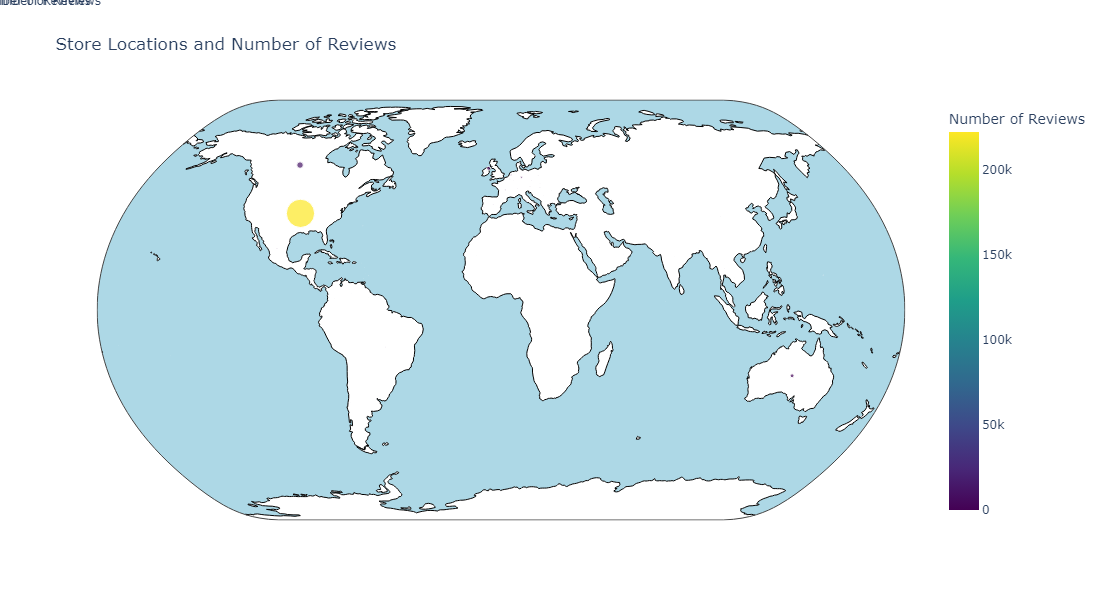

In [101]:
# Create the scatter map
fig = px.scatter_geo(location_reviews,
                     lat='latitude',
                     lon='longitude',
                     hover_name='store_location',
                     size='num_reviews',
                     color='num_reviews',  # Color by number of reviews
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='Store Locations and Number of Reviews',
                     projection="natural earth")  # Choose projection as needed

# Update layout for better visualization and increase figure size
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        coastlinecolor="black",
    ),
    coloraxis_colorbar=dict(
        title="Number of Reviews"
    ),
    width=1000,  # Adjust width as needed
    height=600,  # Adjust height as needed
)

# Add annotations for insight
fig.add_annotation(
    x=-95.712891,  # Longitude of USA
    y=37.09024,    # Latitude of USA
    text="USA: High Number of Reviews",
    showarrow=True,
    arrowhead=1,
    ax=50,
    ay=-50
)

fig.add_annotation(
    x=-106.346771,  # Longitude of Canada
    y=56.130366,    # Latitude of Canada
    text="Canada: High Number of Reviews",
    showarrow=True,
    arrowhead=1,
    ax=-50,
    ay=50
)

# Show the plot
fig.show()

### Insight:

- Canada and the USA have a high number of reviews indicating high number of angedgement

In [102]:
# # Create new features
df_copy['review_length'] = df_copy['review'].apply(len)
df_copy['title_length'] = df_copy['title'].apply(len)


In [73]:

# Convert date-related columns to datetime format
# df_copy['date'] = pd.to_datetime(df_copy[['year', 'month', 'date']], errors='coerce')

In [103]:
df_copy.head()


,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label,review_length,title_length
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5,196,26
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,235,45
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,161,43
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,191,10
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,314,42


In [104]:

# Drop columns
columns_to_drop = [
    'reviewer_id',  'year', 'latitude', 'longitude'
]

df_copy = df_copy.drop(columns=columns_to_drop)
df_copy.head()


,store_location,date,month,title,review,review-label,review_length,title_length
0,US,2023,6,Great help with lost order,I had an order that was lost in transit. When ...,5,196,26
1,US,2023,6,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,235,45
2,US,2023,6,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,161,43
3,US,2023,6,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,191,10
4,CA,2023,6,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,314,42


In [181]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from preprocessing_function import CustomPreprocess
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os


In [121]:
import keras.preprocessing
print(dir(keras.preprocessing))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'image', 'image_dataset_from_directory', 'sequence', 'text_dataset_from_directory', 'timeseries_dataset_from_array']


In [105]:

# Standardize numerical features
scaler = StandardScaler()
df_copy[['review_length', 'title_length', 'date', 'month']] = scaler.fit_transform(df_copy[['review_length', 'title_length', 'date', 'month']])


In [106]:

# Encode categorical variables
label_encoder = LabelEncoder()
df_copy['store_location'] = label_encoder.fit_transform(df_copy['store_location'])
df_copy.head()

,store_location,date,month,title,review,review-label,review_length,title_length
0,126,1.522062,-0.331836,Great help with lost order,I had an order that was lost in transit. When ...,5,0.359293,-0.182148
1,126,1.522062,-0.331836,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,0.640583,1.113110
2,126,1.522062,-0.331836,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,0.106852,0.976767
3,126,1.522062,-0.331836,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,0.323230,-1.272892
4,17,1.522062,-0.331836,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,1.210377,0.908595


In [109]:
# Testing

custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")


'best days life '

In [110]:
# Calling preprocessing_text function on entire dataset
df_copy['title'] = df_copy['title'].apply(custom.preprocess_text)
df_copy['review'] = df_copy['review'].apply(custom.preprocess_text)



In [111]:
# Confirmation
df_copy

,store_location,date,month,title,review,review-label,review_length,title_length
0,126,1.522062,-0.331836,great help lost order,order lost transit called help customer servic...,5,0.359293,-0.182148
1,126,1.522062,-0.331836,ordered wrong size tee,ordered wrong size tee difficulties returning ...,5,0.640583,1.113110
2,126,1.522062,-0.331836,guys offer best customer,guys offer best customer service retail produc...,5,0.106852,0.976767
3,126,1.522062,-0.331836,good stuff,looked obscure phrase shirt teepublic process ...,5,0.323230,-1.272892
4,17,1.522062,-0.331836,order arrived good timely,order arrived good timely fashion items receiv...,4,1.210377,0.908595
...,...,...,...,...,...,...,...,...
278094,126,-2.085189,-0.874958,great site,great site supports independent artists giving...,5,-0.145588,-1.272892
278095,126,-2.085189,-0.874958,highly recommend,delivery quick arrives promised shirts quality...,5,-0.520642,-0.795692
278096,50,-2.085189,-0.874958,great quality,great quality fast delivery would recommend,5,-0.722595,-1.068378
278097,126,-2.085189,-0.874958,dudes rock,dudes rock seriously,5,-0.895697,-1.204721


In [150]:
# Split your data into training and testing sets
X = df_copy.drop(['review-label'], axis=1)  # features
y = df_copy['review-label']  # target variable


In [174]:
# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Preparing embedding layer

Embedding layer converts our textual data into numeric form. It is then used as the first layer for the deep learning models


In [175]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

# Create a Tokenizer instance
word_tokenizer = Tokenizer()

# Fit the tokenizer on the training data
word_tokenizer.fit_on_texts(X_train["review"])

# Convert the training and testing data to sequences
X_train_sequences = word_tokenizer.texts_to_sequences(X_train['review'])
X_test_sequences = word_tokenizer.texts_to_sequences(X_test['review'])


In [135]:
# import io
# import json
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [154]:
# X_train

In [128]:
# # Saving
# tokenizer_json = word_tokenizer.to_json()
# with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(tokenizer_json, ensure_ascii=False))
    

In [176]:
# # Adding 1 to store dimensions for words for which no pretrained word embeddings exist

# vocab_length = len(word_tokenizer.word_index) + 1

# vocab_length


In [177]:
# Padding all reviews to fixed length 100

maxlen = 100

# Pad sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)


In [190]:
# Load GloVe embeddings
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_dim = 100
word_index = word_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [195]:
# Build the LSTM model
model = Sequential()

# Initialize Embedding layer without input_length
embedding_layer = Embedding(input_dim=len(word_index) + 1, 
                            output_dim=embedding_dim)

model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Set weights for the Embedding layer
embedding_layer.set_weights([embedding_matrix])
embedding_layer.trainable = False  # Freeze the embedding layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


ValueError: You called `set_weights(weights)` on layer 'embedding_15' with a weight list of length 1, but the layer was expecting 0 weights.

In [187]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


ValueError: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11302   ,  0.51802999, -0.61565   , ...,  0.34717   ,
        -0.21518999, -0.13248999],
       [-0.013786  ,  0.38216001,  0.53236002, ..., -1.04260004,
         0.28854999,  0.63055998],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16805001,  0.27202001, -0.11403   , ..., -0.14866   ,
        -0.26578   ,  0.071097  ]])], 'input_length': 100}

In [184]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

# # Build the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=vocab_length, 
#                     output_dim=embedding_dim, 
#                     weights=[embedding_matrix], 
#                     input_length=maxlen, 
#                     trainable=False))  # Use pre-trained embeddings
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
# model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


ValueError: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11302   ,  0.51802999, -0.61565   , ...,  0.34717   ,
        -0.21518999, -0.13248999],
       [-0.013786  ,  0.38216001,  0.53236002, ..., -1.04260004,
         0.28854999,  0.63055998],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16805001,  0.27202001, -0.11403   , ..., -0.14866   ,
        -0.26578   ,  0.071097  ]])], 'input_length': 100}

In [185]:

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [164]:
 # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [186]:
# Train the model
 # Train the model
# history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_length, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=maxlen, 
                    trainable=False))  # Use pre-trained embeddings
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
